In [1]:
# Priting over 1 line of code within the same cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [128]:
# LIBRARIES

# Must
import os
import pandas as pd
import numpy as np
#import datetime as dt

# Visualization
#import missingno
import matplotlib.pyplot as plt
#import seaborn as sns

# Soup
from bs4 import BeautifulSoup
import requests

# REGEX
import re

# Math
#import math
#from scipy import stats
#from scipy.stats import shapiro
#import scipy.stats as st

# Machine Learning
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.preprocessing import LabelEncoder
#from sklearn import linear_model
#from sklearn.metrics import r2_score
#from sklearn.metrics import mean_squared_error
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.linear_model import LogisticRegression
#from sklearn.neural_network import MLPRegressor
#from sklearn.datasets import make_regression
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.ensemble import GradientBoostingRegressor
#from sklearn.metrics import precision_score
#from sklearn.metrics import recall_score
#from sklearn.metrics import f1_score
from sklearn.cluster import KMeans
from sklearn import cluster, datasets
from matplotlib.lines import Line2D
from sklearn.metrics import silhouette_score

# Extra
import warnings
warnings.filterwarnings('ignore')
#import pickle
import random
from random import randint
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import getpass
import timeit
from time import sleep

In [156]:
# storing client_id and secret
client_id = getpass.getpass()
client_secret= getpass.getpass()

········
········


In [157]:
# calling the spotify auth
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id,
                                                           client_secret))

In [ ]:
# TOP 100 billboard
url= 'https://www.billboard.com/charts/hot-100'

In [ ]:
# response
response = requests.get(url)
response.status_code

In [ ]:
soup = BeautifulSoup(response.content, "html.parser")

### Scrape the current top 100 songs and their respective artists, and put the information into a pandas dataframe.

### All up to this point was focused on scraping a webpage to extract the top 100 songs

In [15]:
top_songs_100= pd.read_csv('./minted_dfs/top_songs.csv')

In [16]:
top_songs_100.head()

,artist,song
0,Polo G,Rapstar
1,Silk Sonic (Bruno Mars & Anderson .Paak),Leave The Door Open
2,Justin Bieber Featuring Daniel Caesar & Giveon,Peaches
3,Lil Nas X,Montero (Call Me By Your Name)
4,Dua Lipa Featuring DaBaby,Levitating


In [ ]:
song_uri = playlist["items"][46]["track"]["uri"]

In [244]:
sp.audio_features('3Vz4JalmlS6UuoH7cUtEDn')

[{'danceability': 0.412,
  'energy': 0.966,
  'key': 10,
  'loudness': -3.007,
  'mode': 0,
  'speechiness': 0.0383,
  'acousticness': 0.000502,
  'instrumentalness': 0,
  'liveness': 0.225,
  'valence': 0.735,
  'tempo': 143.09,
  'type': 'audio_features',
  'id': '3Vz4JalmlS6UuoH7cUtEDn',
  'uri': 'spotify:track:3Vz4JalmlS6UuoH7cUtEDn',
  'track_href': 'https://api.spotify.com/v1/tracks/3Vz4JalmlS6UuoH7cUtEDn',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/3Vz4JalmlS6UuoH7cUtEDn',
  'duration_ms': 200680,
  'time_signature': 4}]

In [247]:
sp.search(q='mandatory suicide', limit= 1)['tracks']['items'][0]['uri']

'spotify:track:54hjFPLAWMurvAqlh0fifV'

In [ ]:
Mandatory Suicide	South Of Heaven	54hjFPLAWMurvAqlh0fifV

In [261]:
new_song_test= (input('Input your new song'))            

Input your new songmandatory suicide


In [267]:
song_uri = sp.search(q= new_song_test, limit= 1)['tracks']['items'][0]['uri']
song_uri= song_uri.split(':')[2]
song_uri

'54hjFPLAWMurvAqlh0fifV'

In [268]:
audio_f= sp.audio_features(str(song_uri))
audio_f

[{'danceability': 0.359,
  'energy': 0.996,
  'key': 8,
  'loudness': -2.936,
  'mode': 1,
  'speechiness': 0.0933,
  'acousticness': 0.000668,
  'instrumentalness': 0.618,
  'liveness': 0.101,
  'valence': 0.276,
  'tempo': 148.014,
  'type': 'audio_features',
  'id': '54hjFPLAWMurvAqlh0fifV',
  'uri': 'spotify:track:54hjFPLAWMurvAqlh0fifV',
  'track_href': 'https://api.spotify.com/v1/tracks/54hjFPLAWMurvAqlh0fifV',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/54hjFPLAWMurvAqlh0fifV',
  'duration_ms': 245133,
  'time_signature': 4}]

In [291]:
new_a= pd.DataFrame(audio_f)
new_a

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.359,0.996,8,-2.936,1,0.0933,0.000668,0.618,0.101,0.276,148.014,audio_features,54hjFPLAWMurvAqlh0fifV,spotify:track:54hjFPLAWMurvAqlh0fifV,https://api.spotify.com/v1/tracks/54hjFPLAWMur...,https://api.spotify.com/v1/audio-analysis/54hj...,245133,4


In [302]:
new_a= new_a[['danceability', 'energy', 'valence', 'tempo', 'loudness', 'speechiness', 'instrumentalness', 'mode', 'acousticness', 'liveness']]
new_a

,danceability,energy,valence,tempo,loudness,speechiness,instrumentalness,mode,acousticness,liveness
0,0.359,0.996,0.276,148.014,-2.936,0.0933,0.618,1,0.000668,0.101


In [303]:
new_b= new_a.values
new_b

array([[ 3.59000e-01,  9.96000e-01,  2.76000e-01,  1.48014e+02, -2.93600e+00,  9.33000e-02,  6.18000e-01,  1.00000e+00,  6.68000e-04,  1.01000e-01]])

In [301]:
new_c= StandardScaler().fit_transform(new_b)
new_

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [281]:
new_a

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [304]:
clus_2 = kmeans.predict(new_b)

In [305]:
clus_2

array([6], dtype=int32)

In [ ]:
df[cluster] == clus_1 
random

In [150]:
# Main function for the problem...

def returning_song():
    name_song= str(input('Name your song: '))
    
    random_song_100= random.choice(song_100)
    index_rand_100= top_songs_100[top_songs_100['song']== random_song_100].index[0]
    
    if name_song.lower() in list(top_songs_100['song'].str.lower()):    
        print('This is a hot song\n',
              '\nYou might also like this songs: ', random_song_100, 
              '\nBy the artist: ', top_songs_100['artist'].iloc[index_rand_100])
    else:
        print('Not a hot song, but i can recommend you one if you like...\n')
        print('Press 1 to continue or 2 to cancel')
        
        inp_loop= str(input())
        if inp_loop== '1':
            print('For the time being our recommendator only works with rock\nSo bear in mind that the program will find the most similar and return a rock song')
            new_song= (input('Input your new song'))
            
            song_uri = sp.search(q= new_song, limit= 1)['tracks']['items'][0]['uri']
            audio_f= sp.audio_features(str(song_uri))
            
            
            
            
            
            
        elif inp_loop== '2':
            print('ok bye')
        else:
            print('Try again')
    
    

In [151]:
returning_song()

Name your song: f
Not a hot song, but i can recommend you one if you like...

Press 1 to continue or 2 to cancel
1
For the time being our recommendator only works with rock
So bear in mind that the program will find the most similar and return a rock song
Input your new songd
d


### Looking for several rock playlists

In [ ]:
# Lets run this on the playlist separated

start = timeit.default_timer()
#playlist= sp.next(playlist)

while playlist_1['next']!= None:

    playlist_1= sp.next(playlist_1)

    for i in range(len(playlist_1['items'])):
        artist_name.append(playlist_1['items'][i]['track']['artists'][0]['name'])
        song_name.append(playlist_1['items'][i]['track']['name'])
        album_name.append(playlist_1['items'][i]['track']['album']['name'])
        song_uri.append(playlist_1['items'][i]['track']['uri'].split(':')[2])
        audio_features.append(sp.audio_features(playlist_1['items'][i]['track']['uri']))

    #sleep(2)




rock_playlist_1= pd.DataFrame({'artist': artist_name, 'song': song_name, 'album': album_name, 'uri': song_uri})

stop = timeit.default_timer()
print ('Time to run this code (in seconds):', stop - start)

### Let's start using those freshly created databases

In [ ]:
rock_playlist= pd.read_csv('./minted_dfs/rock_playlist.csv')
audio_features= pd.read_csv('./minted_dfs/rock_audio_features.csv')

In [29]:
rock.head(2)
audio_features.head(2)

,artist,song,album,uri
0,Eve 6,Inside Out,Eve 6,4GiVcDqNQI0fc0yYuRGH9m
1,Cage The Elephant,James Brown,Cage The Elephant,3Vz4JalmlS6UuoH7cUtEDn


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.483,0.818,11,-7.666,1,0.0444,0.114000,0.0,0.367,0.691,175.668,audio_features,4GiVcDqNQI0fc0yYuRGH9m,spotify:track:4GiVcDqNQI0fc0yYuRGH9m,https://api.spotify.com/v1/tracks/4GiVcDqNQI0f...,https://api.spotify.com/v1/audio-analysis/4GiV...,219467,4
1,0.412,0.966,10,-3.007,0,0.0383,0.000502,0.0,0.225,0.735,143.090,audio_features,3Vz4JalmlS6UuoH7cUtEDn,spotify:track:3Vz4JalmlS6UuoH7cUtEDn,https://api.spotify.com/v1/tracks/3Vz4JalmlS6U...,https://api.spotify.com/v1/audio-analysis/3Vz4...,200680,4


In [30]:
red_audio_features= audio_features[['danceability', 'energy', 'valence', 'tempo', 'loudness', 'speechiness', 'instrumentalness', 'mode', 'acousticness', 'liveness']]

In [31]:
red_audio_features.head()

,danceability,energy,valence,tempo,loudness,speechiness,instrumentalness,mode,acousticness,liveness
0,0.483,0.818,0.691,175.668,-7.666,0.0444,0.000,1,0.114000,0.367
1,0.412,0.966,0.735,143.090,-3.007,0.0383,0.000,0,0.000502,0.225
2,0.359,0.996,0.276,148.014,-2.936,0.0933,0.618,1,0.000668,0.101
3,0.342,0.820,0.525,119.421,-10.910,0.0460,0.749,0,0.000026,0.104
4,0.325,0.985,0.221,125.307,-3.941,0.1510,0.107,1,0.001770,0.351


- __Danceability__: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

- __Energy__: Measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features for energy include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

- __Valence__: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

- __Tempo__: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

- __Loudness__: Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

- __Speechiness__: Detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audiobook, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music.

- __Instrumentalness__: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

- __Mode__: Indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

- __Acousticness__: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

- __Liveness__: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides a strong likelihood that the track is live.

In [260]:
rock_gen= rock.join(red_audio_features)
rock_gen.head()

,artist,song,album,uri,danceability,energy,valence,tempo,loudness,speechiness,instrumentalness,mode,acousticness,liveness
0,Eve 6,Inside Out,Eve 6,4GiVcDqNQI0fc0yYuRGH9m,0.483,0.818,0.691,175.668,-7.666,0.0444,0.000,1,0.114000,0.367
1,Cage The Elephant,James Brown,Cage The Elephant,3Vz4JalmlS6UuoH7cUtEDn,0.412,0.966,0.735,143.090,-3.007,0.0383,0.000,0,0.000502,0.225
2,Slayer,Mandatory Suicide,South Of Heaven,54hjFPLAWMurvAqlh0fifV,0.359,0.996,0.276,148.014,-2.936,0.0933,0.618,1,0.000668,0.101
3,Pantera,Shattered,The Pantera Collection,1hTmOdxJWP3i3i2tYEHxtK,0.342,0.820,0.525,119.421,-10.910,0.0460,0.749,0,0.000026,0.104
4,Megadeth,Holy Wars...The Punishment Due - Remastered 2004,Rust In Peace,5LyRtsQLhcXmy50VXhQXXS,0.325,0.985,0.221,125.307,-3.941,0.1510,0.107,1,0.001770,0.351


In [42]:
rock_gen.head()
len(rock_gen)

,artist,song,album,uri,danceability,energy,valence,tempo,loudness,speechiness,instrumentalness,mode,acousticness,liveness
0,Eve 6,Inside Out,Eve 6,4GiVcDqNQI0fc0yYuRGH9m,0.483,0.818,0.691,175.668,-7.666,0.0444,0.000,1,0.114000,0.367
1,Cage The Elephant,James Brown,Cage The Elephant,3Vz4JalmlS6UuoH7cUtEDn,0.412,0.966,0.735,143.090,-3.007,0.0383,0.000,0,0.000502,0.225
2,Slayer,Mandatory Suicide,South Of Heaven,54hjFPLAWMurvAqlh0fifV,0.359,0.996,0.276,148.014,-2.936,0.0933,0.618,1,0.000668,0.101
3,Pantera,Shattered,The Pantera Collection,1hTmOdxJWP3i3i2tYEHxtK,0.342,0.820,0.525,119.421,-10.910,0.0460,0.749,0,0.000026,0.104
4,Megadeth,Holy Wars...The Punishment Due - Remastered 2004,Rust In Peace,5LyRtsQLhcXmy50VXhQXXS,0.325,0.985,0.221,125.307,-3.941,0.1510,0.107,1,0.001770,0.351


6411

In [88]:
# Dealing with repeated values
rock_gen.isnull().sum()
len(rock_gen.drop_duplicates('uri'))

artist              0
song                0
album               0
uri                 0
danceability        0
energy              0
valence             0
tempo               0
loudness            0
speechiness         0
instrumentalness    0
mode                0
acousticness        0
liveness            0
dtype: int64

6220

In [110]:
g= rock_gen.groupby('uri')['artist'].value_counts()
g.where(g> 1).dropna()

uri                     artist          
08ZUOlAjNu34wj283BPDJJ  John Frusciante     2.0
0AfIsqZ4gTUg9CwwW2jLeK  Stone Sour          2.0
0CFtlafteObzOEuJdESQkb  Aerosmith           2.0
0DnGfA1r8pAssJCuq4ojla  Gary Moore          2.0
0EYOdF5FCkgOJJla8DI2Md  System Of A Down    2.0
                                           ... 
7txxAtOMwLLnQTpKeBL6bp  Danzig              2.0
7uSsHbBFFAnkRQR1rDwP3L  Spiderbait          2.0
7vAwjvJs8YSlHcykJu7nc0  Helloween           2.0
7vxlM6ouhpJy5WMEZqU7vV  John Frusciante     2.0
7xyYsOvq5Ec3P4fr6mM9fD  Muse                2.0
Name: artist, Length: 188, dtype: float64

In [112]:
rock_gen.drop_duplicates(subset=["artist", 'song', 'album', 'uri'],keep="first", inplace= True)

In [117]:
rock= rock_gen[['artist', 'song', 'album', 'uri']]

audio_features= rock_gen.drop(columns= ['artist', 'song', 'album', 'uri'])

In [277]:
X_prep = StandardScaler().fit_transform(audio_features)

# Now, all features will have the same weight.
pd.DataFrame(X_prep,columns=audio_features.columns).head()

,danceability,energy,valence,tempo,loudness,speechiness,instrumentalness,mode,acousticness,liveness,clusters
0,0.276091,0.159024,1.110800,1.612701,-0.243575,-0.438921,-0.516259,0.753877,0.069881,0.707543,0.024423
1,-0.219710,0.897450,1.299629,0.524763,1.100840,-0.544125,-0.516259,-1.326476,-0.495240,-0.024152,0.660038
2,-0.589816,1.047131,-0.670198,0.689199,1.121327,0.404435,1.828413,0.753877,-0.494413,-0.663097,1.295652
3,-0.708529,0.169002,0.398401,-0.265661,-1.179673,-0.411327,2.325423,-1.326476,-0.497609,-0.647639,1.295652
4,-0.827242,0.992248,-0.906234,-0.069098,0.831322,1.399561,-0.110305,0.753877,-0.488926,0.625098,1.931267


array([[ 0.27609109,  0.15902376,  1.11079994, ...,  0.06988097,  0.70754252,  0.02442313],
       [-0.21971037,  0.89745015,  1.29962865, ..., -0.49523981, -0.02415246,  0.66003768],
       [-0.58981569,  1.04713117, -0.67019814, ..., -0.49441328, -0.66309738,  1.29565223],
       ...,
       [ 0.681112  , -1.97143616, -0.92769184, ...,  2.21588405,  0.44990344, -1.88242051],
       [ 2.30817878, -2.51028785, -1.356848  , ...,  3.14200139, -0.59611122, -1.88242051],
       [-0.20574414, -0.44468971, -0.40841288, ..., -0.46925874,  0.10981986,  0.02442313]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=11, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=13, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=14, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=15, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=16, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=17, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=18, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=19, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

<Figure size 1152x576 with 0 Axes>

Text(0.5, 0, 'k')

Text(0, 0.5, 'inertia')

([<matplotlib.axis.XTick at 0x7ffbee15edd0>,
 <a list of 18 Text xticklabel objects>)

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

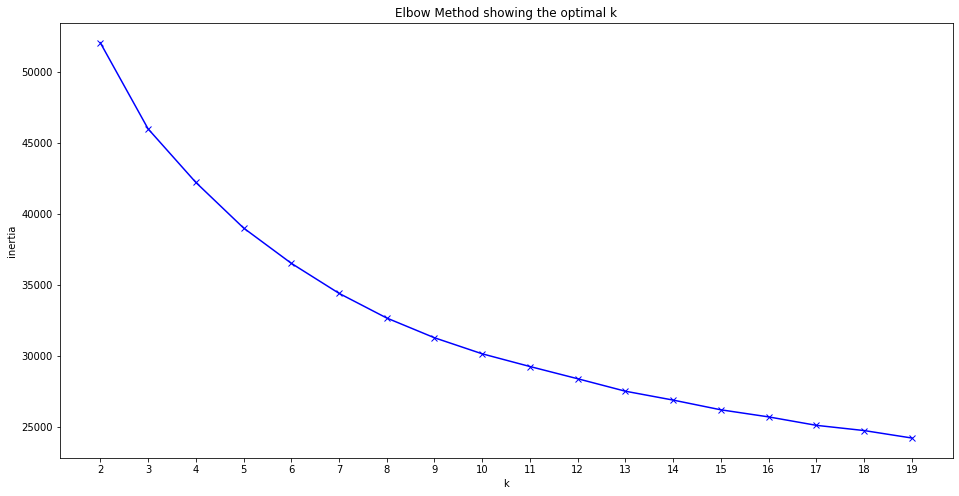

In [127]:
# Choosing clusters
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=11, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=13, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=14, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=15, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=16, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=17, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=18, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=19, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

<Figure size 1152x576 with 0 Axes>

Text(0.5, 0, 'k')

Text(0, 0.5, 'silhouette score')

([<matplotlib.axis.XTick at 0x7ffbedc7e450>,
 <a list of 18 Text xticklabel objects>)

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

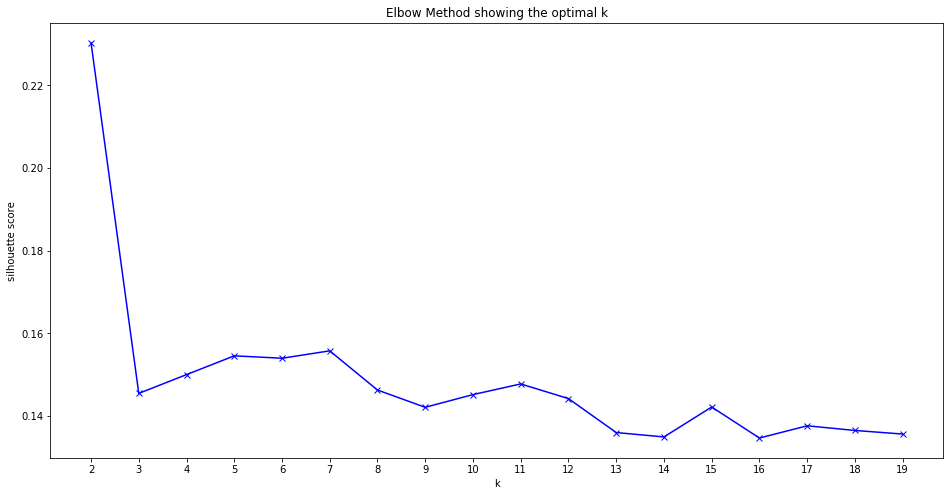

In [129]:
# Choosing silhouette
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [275]:
kmeans = KMeans(n_clusters=7, random_state=1234)
kmeans.fit(X_prep)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

In [276]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_prep)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0     635
1     397
2    1200
3    1631
4    1372
5     667
6     318
dtype: int64

In [241]:
clusters

array([3, 4, 5, ..., 0, 0, 3], dtype=int32)

In [139]:
type(clusters)

numpy.ndarray

In [138]:
kmeans.inertia_

34396.94198559536

In [140]:
# Making the final table
audio_features['clusters'] = clusters.tolist()

In [141]:
audio_features.head()

,danceability,energy,valence,tempo,loudness,speechiness,instrumentalness,mode,acousticness,liveness,clusters
0,0.483,0.818,0.691,175.668,-7.666,0.0444,0.000,1,0.114000,0.367,3
1,0.412,0.966,0.735,143.090,-3.007,0.0383,0.000,0,0.000502,0.225,4
2,0.359,0.996,0.276,148.014,-2.936,0.0933,0.618,1,0.000668,0.101,5
3,0.342,0.820,0.525,119.421,-10.910,0.0460,0.749,0,0.000026,0.104,5
4,0.325,0.985,0.221,125.307,-3.941,0.1510,0.107,1,0.001770,0.351,6
